# CUSTOMER SEGMENTATION


### GOAL :



In this project, the primary objective is to perform unsupervised clustering on customer data obtained from a grocery firm's database. Customer segmentation is a valuable approach aimed at categorizing customers into distinct groups based on shared characteristics. By doing so, we can effectively tailor our products and services to meet the unique preferences and behaviors of each customer segment. This not only enhances the overall customer experience but also enables the business to address the specific needs and concerns of different customer types. Ultimately, customer segmentation allows us to optimize the value of each customer and make data-driven decisions that benefit both the customers and the business.



## EXPLORATORY DATA ANALYSIS 

### IMPORT LIBARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### LOADING DATA:




In [2]:
data=pd.read_csv('customer_train (1).csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
print('no of datapoints in the data:',len(data))

no of datapoints in the data: 1680


In [4]:
data.shape

(1680, 31)

In [5]:
data.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

### DATA CLEANING


In [7]:
data.isnull()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data=data.dropna()
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0


In [10]:
data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
print(len(data))

1663


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1663 non-null   int64  
 1   Unnamed: 0           1663 non-null   int64  
 2   ID                   1663 non-null   int64  
 3   Year_Birth           1663 non-null   int64  
 4   Education            1663 non-null   object 
 5   Marital_Status       1663 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1663 non-null   int64  
 8   Teenhome             1663 non-null   int64  
 9   Dt_Customer          1663 non-null   object 
 10  Recency              1663 non-null   int64  
 11  MntCoke              1663 non-null   int64  
 12  MntFruits            1663 non-null   int64  
 13  MntMeatProducts      1663 non-null   int64  
 14  MntFishProducts      1663 non-null   int64  
 15  MntSweetProducts     1663 non-null   int64 

In [13]:
data.duplicated().sum()

0

 **The "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record**.

**Thus to get the values I must check the newest and oldest recorded dates**
.

In [14]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='mixed')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))



The newest customer's enrolment date in therecords: 2014-12-05
The oldest customer's enrolment date in the records: 2012-01-08


**CREATING A FEATURE 'Customer_for' IT INDICATES THE NO.OF DAYS CUSTOMER STARTED  SHOPPING IN THE  STORE RELATIVE TO THE LAST
RECORDED DATE**.

In [15]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83808000000000000
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10713600000000000
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40694400000000000
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5529600000000000
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27648000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,2012-11-28,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0,63676800000000000
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,2013-03-25,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0,53568000000000000
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,2013-06-27,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0,45446400000000000
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,2013-12-02,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0,31795200000000000


**THE DETAILS OF CATAGORICAL DATA**

In [16]:
data["Marital_Status"].value_counts()

Marital_Status
Menikah        644
Bertunangan    434
Lajang         353
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [17]:
 data["Education"].value_counts()

Education
S1     825
S3     369
S2     277
D3     157
SMA     35
Name: count, dtype: int64

**Then we creating some features like 'age','spent','living_with','children','family_size','is_parent','education' from the existing column and also drop seme unwanted column**.

In [18]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83808000000000000,64
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10713600000000000,67
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40694400000000000,56
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5529600000000000,37
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27648000000000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,2012-11-28,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0,63676800000000000,30
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,2013-03-25,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0,53568000000000000,46
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,2013-06-27,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0,45446400000000000,42
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,2013-12-02,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0,31795200000000000,45


In [19]:
#Total spendings on various items
data["Spent"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


In [20]:
#converting catagorical in to numerical
data["Marital_Status"]=data["Marital_Status"].replace({'Menikah':'0','Bertunangan':'1', 'Lajang':'2','Cerai':'3' ,'Janda':'4', 'Duda':'5'})
data["Education"]=data["Education"].replace({"S1":"0", "S3":"1", "S2":"2", "D3":"3", "SMA":"4"})

In [21]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]


In [22]:
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)


In [26]:
#To get further clarity of household, Creating feature indicating "Family_Size"
data['Family_Size'] = data['Marital_Status'] + data['Children']

In [23]:
#For clarity
data=data.rename(columns={"MntCoke": "Coke","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [27]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'Unnamed: 0.1','Unnamed: 0']
data = data.drop(to_drop, axis=1)

In [28]:
data

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent,Family_Size
0,0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,83808000000000000,64,1617000,0,0,2
1,0,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,10713600000000000,67,27000,2,1,4
2,0,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,40694400000000000,56,776000,0,0,1
3,0,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,5529600000000000,37,53000,1,1,2
4,1,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,27648000000000000,40,422000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,3,20193000.0,0,0,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,0,63676800000000000,30,82000,0,0,1
1676,0,27573000.0,1,0,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,0,53568000000000000,46,244000,1,1,1
1677,4,15862000.0,1,0,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,0,45446400000000000,42,36000,1,1,3
1678,1,49544000.0,1,0,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,0,31795200000000000,45,404000,1,1,1


In [29]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent,Family_Size
count,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000
mean,0.922429,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,37110.042093,26979.555021,43331.328924,2.338545,4.038485,2.682502,5.797956,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,0.145520,4.411216e+16,52.150932,6.059008e+05,0.948286,0.710162,2.087192
std,1.106537,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,54348.868950,41273.567857,50904.197540,1.956260,2.616657,2.980317,3.245112,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.352731,2.000642e+16,12.037325,6.027183e+05,0.759834,0.453823,1.355196
min,0.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,0.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.946240e+16,44.000000,6.950000e+04,0.000000,0.000000,1.000000
50%,1.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.406400e+16,51.000000,3.930000e+05,1.000000,1.000000,2.000000
75%,2.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,48000.000000,32000.000000,55000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.909760e+16,61.000000,1.043500e+06,1.000000,1.000000,3.000000
max,4.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,262000.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.175680e+16,128.000000,2.525000e+06,3.000000,1.000000,7.000000


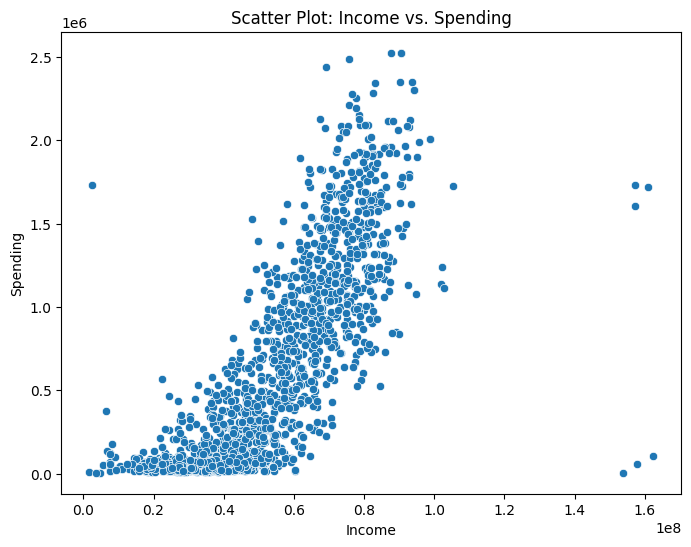

In [30]:
# Scatter Plot: Income vs. Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', data=data)
plt.title('Scatter Plot: Income vs. Spending')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

This means that as income increases, there is a tendency for spending to also increase, though the relationship is not particularly strong

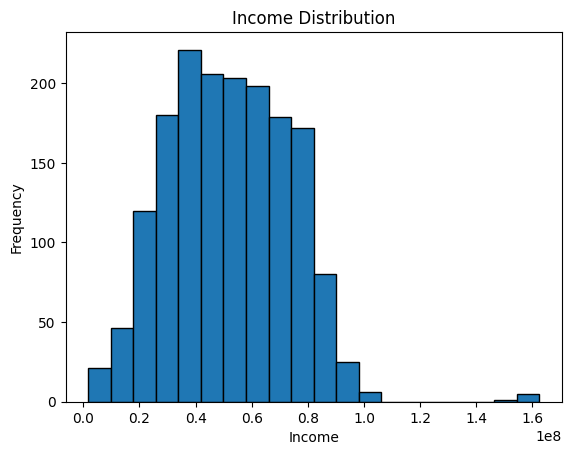

In [31]:
# Plot a histogram of income
plt.hist(data['Income'], bins=20, edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

we got two distinct peaks or modes in the distribution of income values.Each mode represents a group or cluster of data points that have different characteristics in terms of income.

Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point).

<Axes: xlabel='Spent', ylabel='Age'>

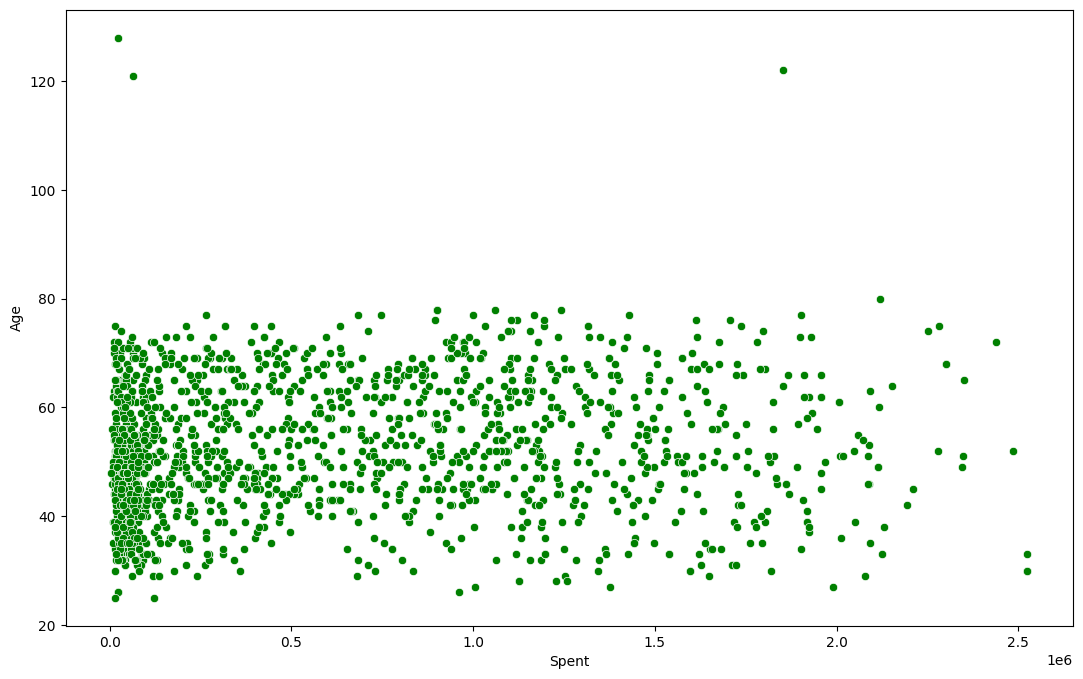

In [32]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age'],color='green')

<Axes: xlabel='Age', ylabel='Density'>

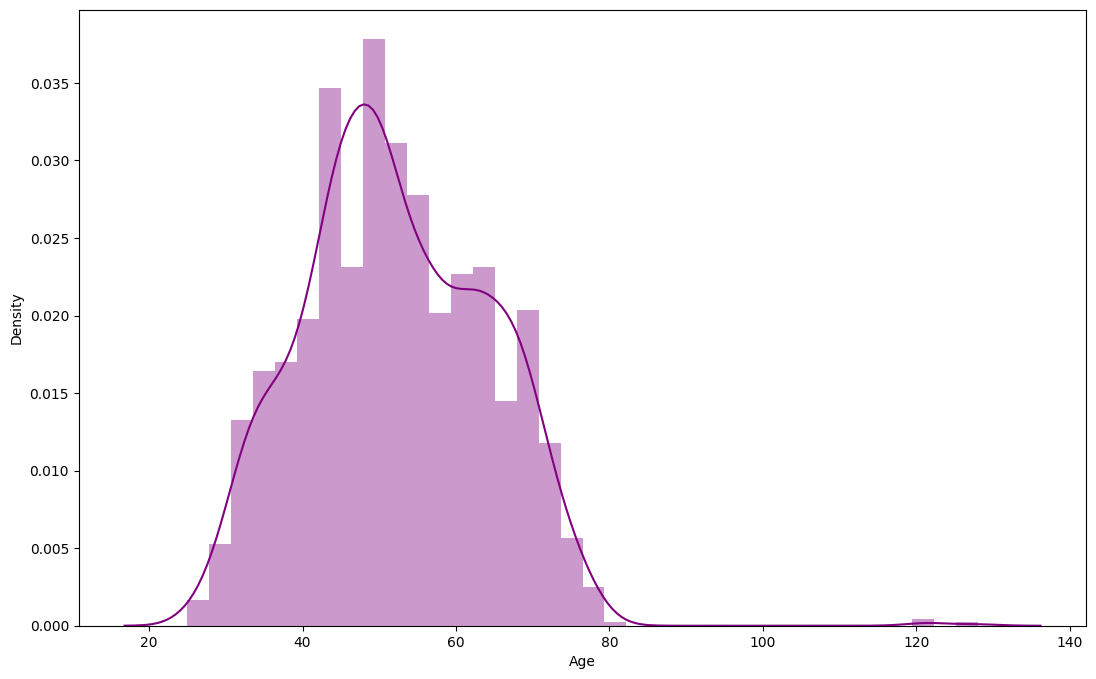

In [33]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple')

<Axes: xlabel='Income', ylabel='Density'>

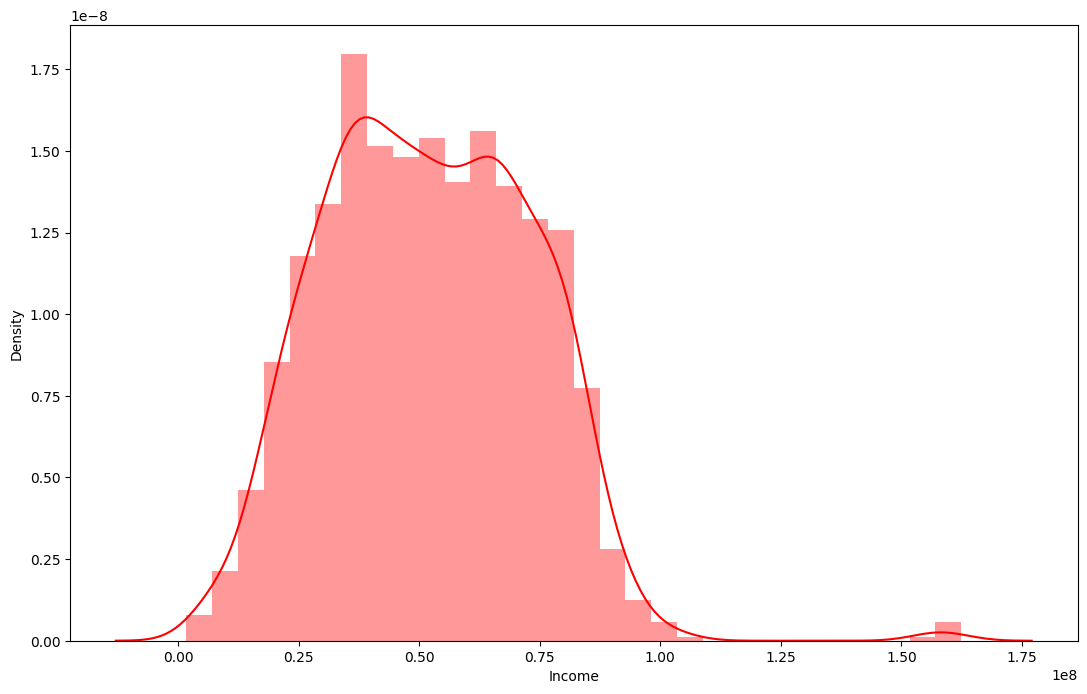

In [34]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Red')

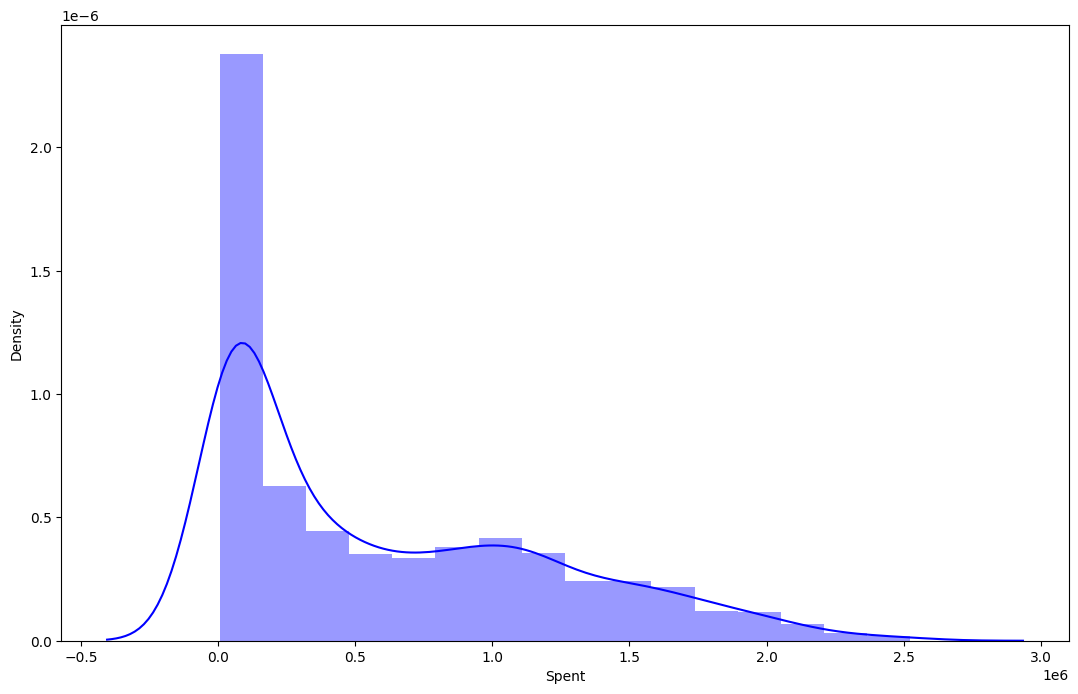

In [35]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='Blue');


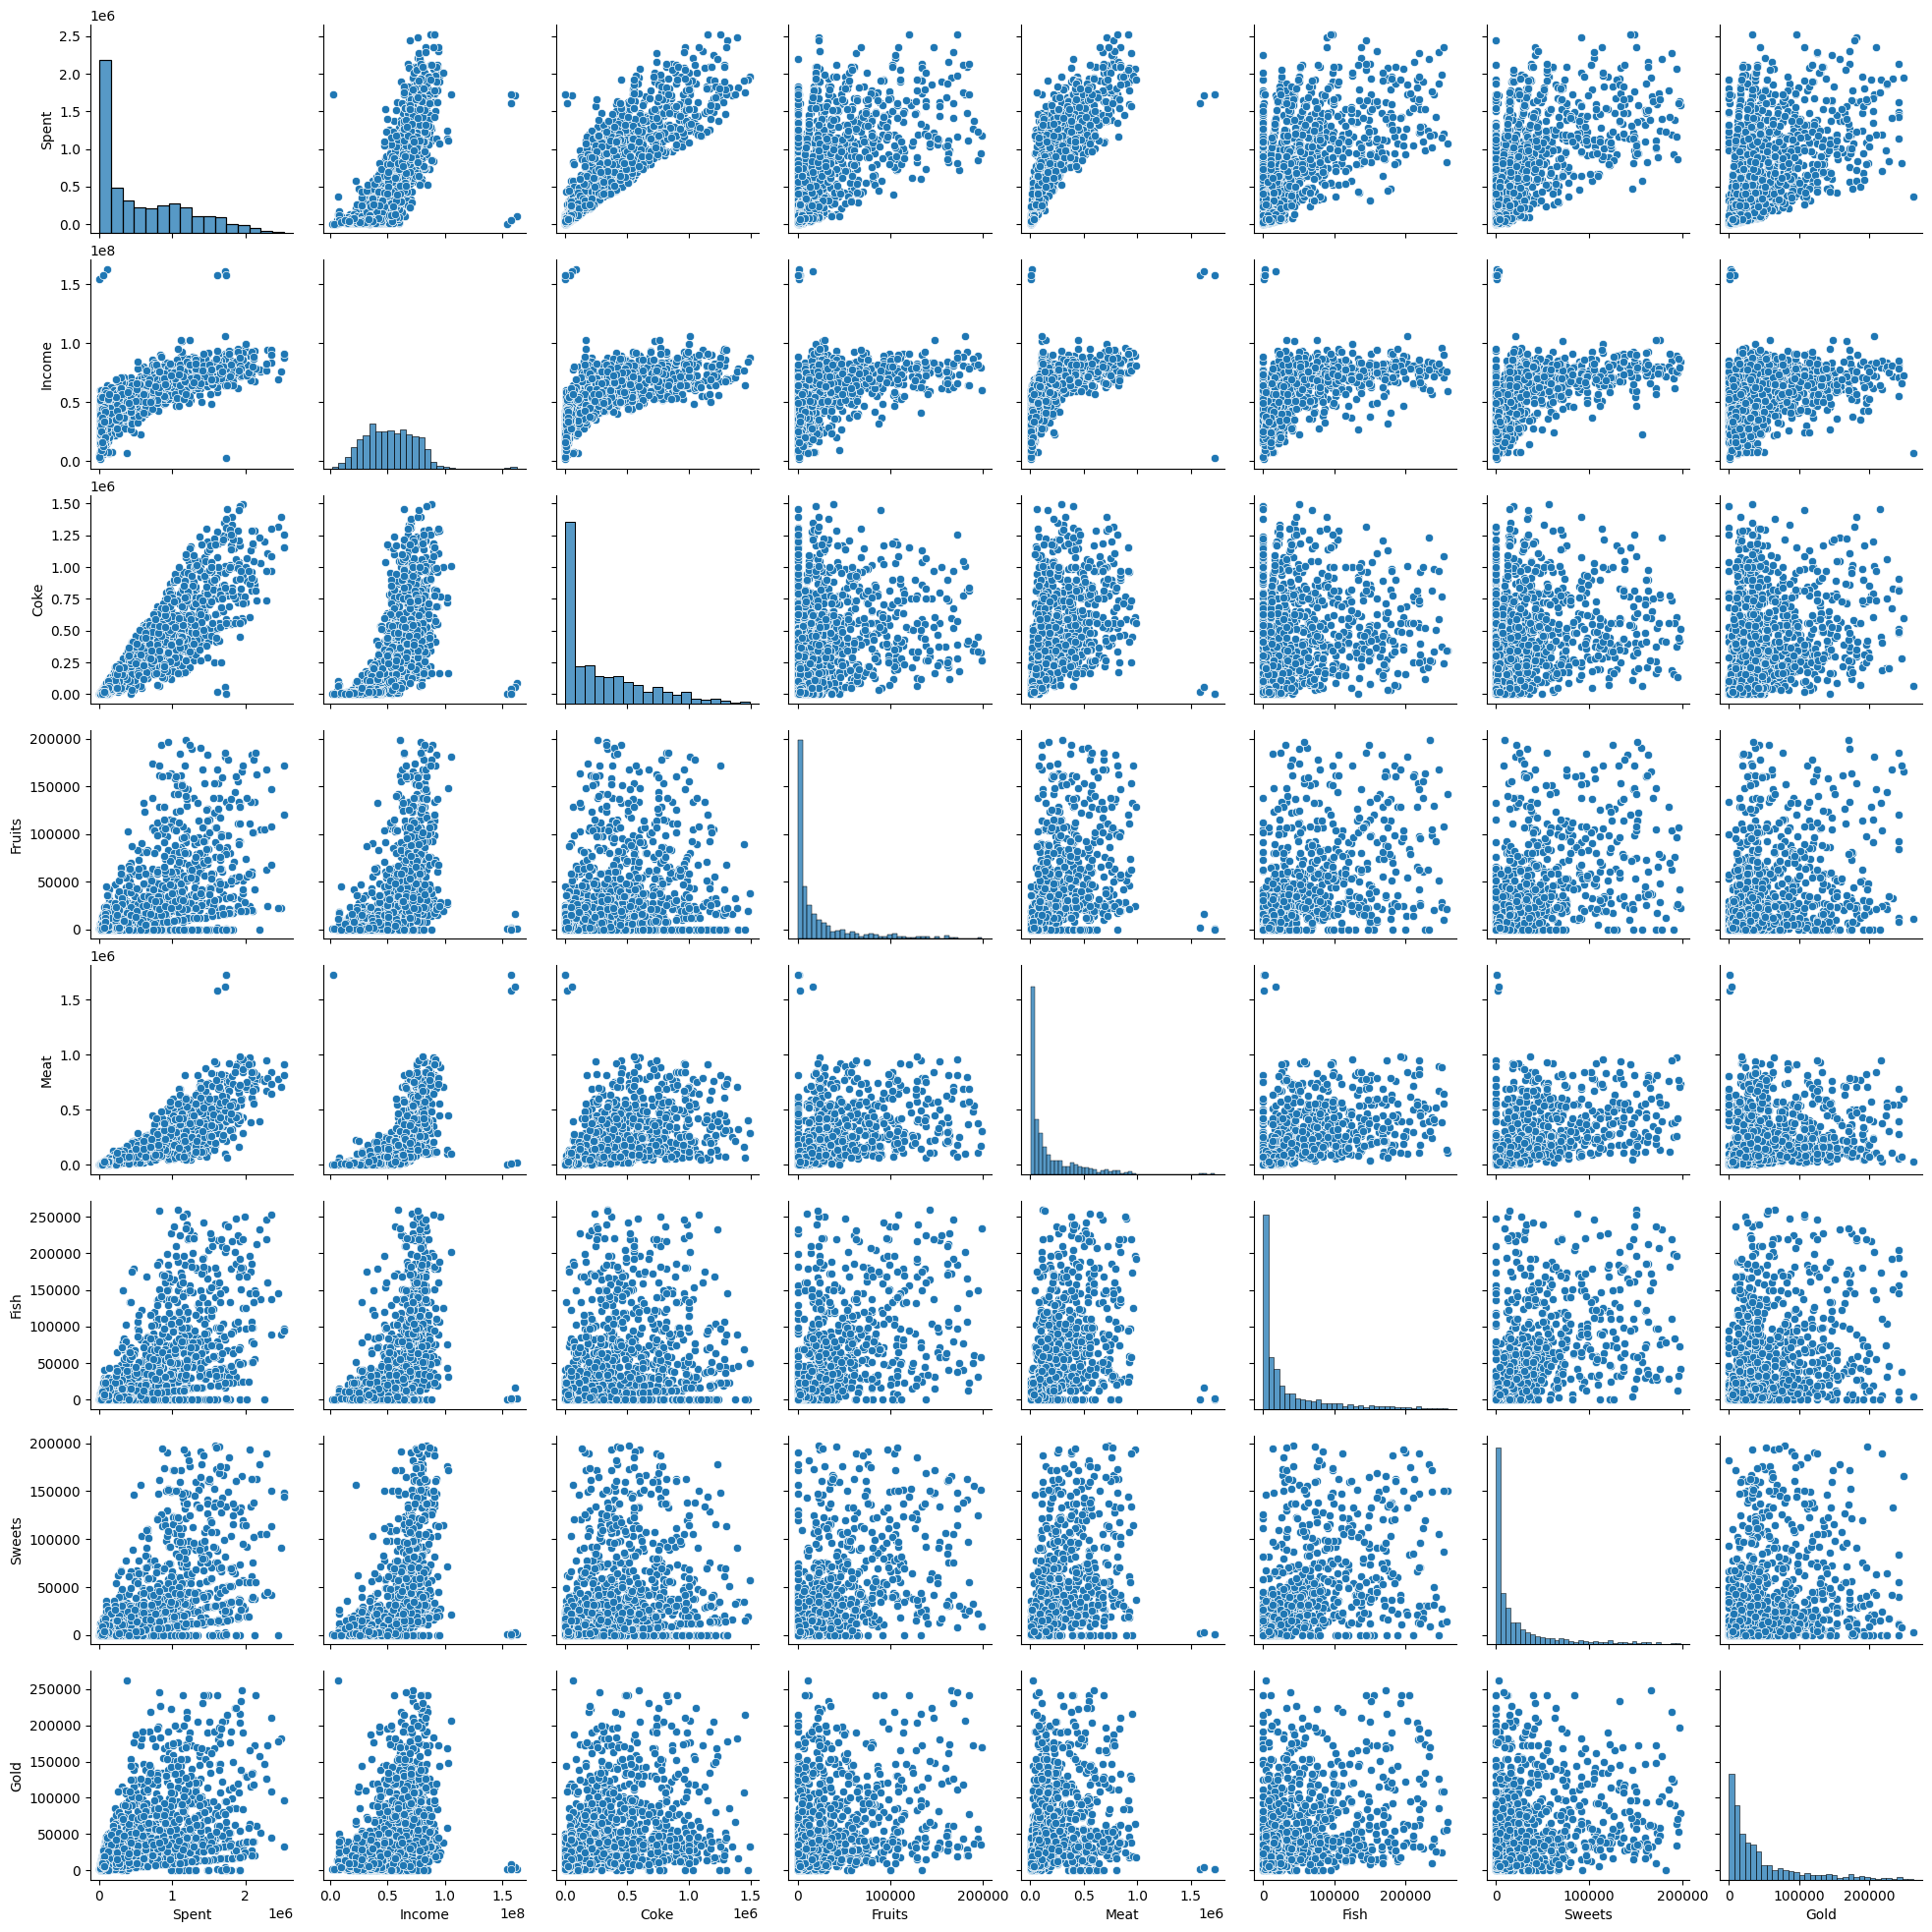

In [39]:
#Scatter plot between the variables
sns.pairplot(data,vars=['Spent','Income','Coke','Fruits', 'Meat', 'Fish', 'Sweets','Gold'])
plt.show()

<Axes: >

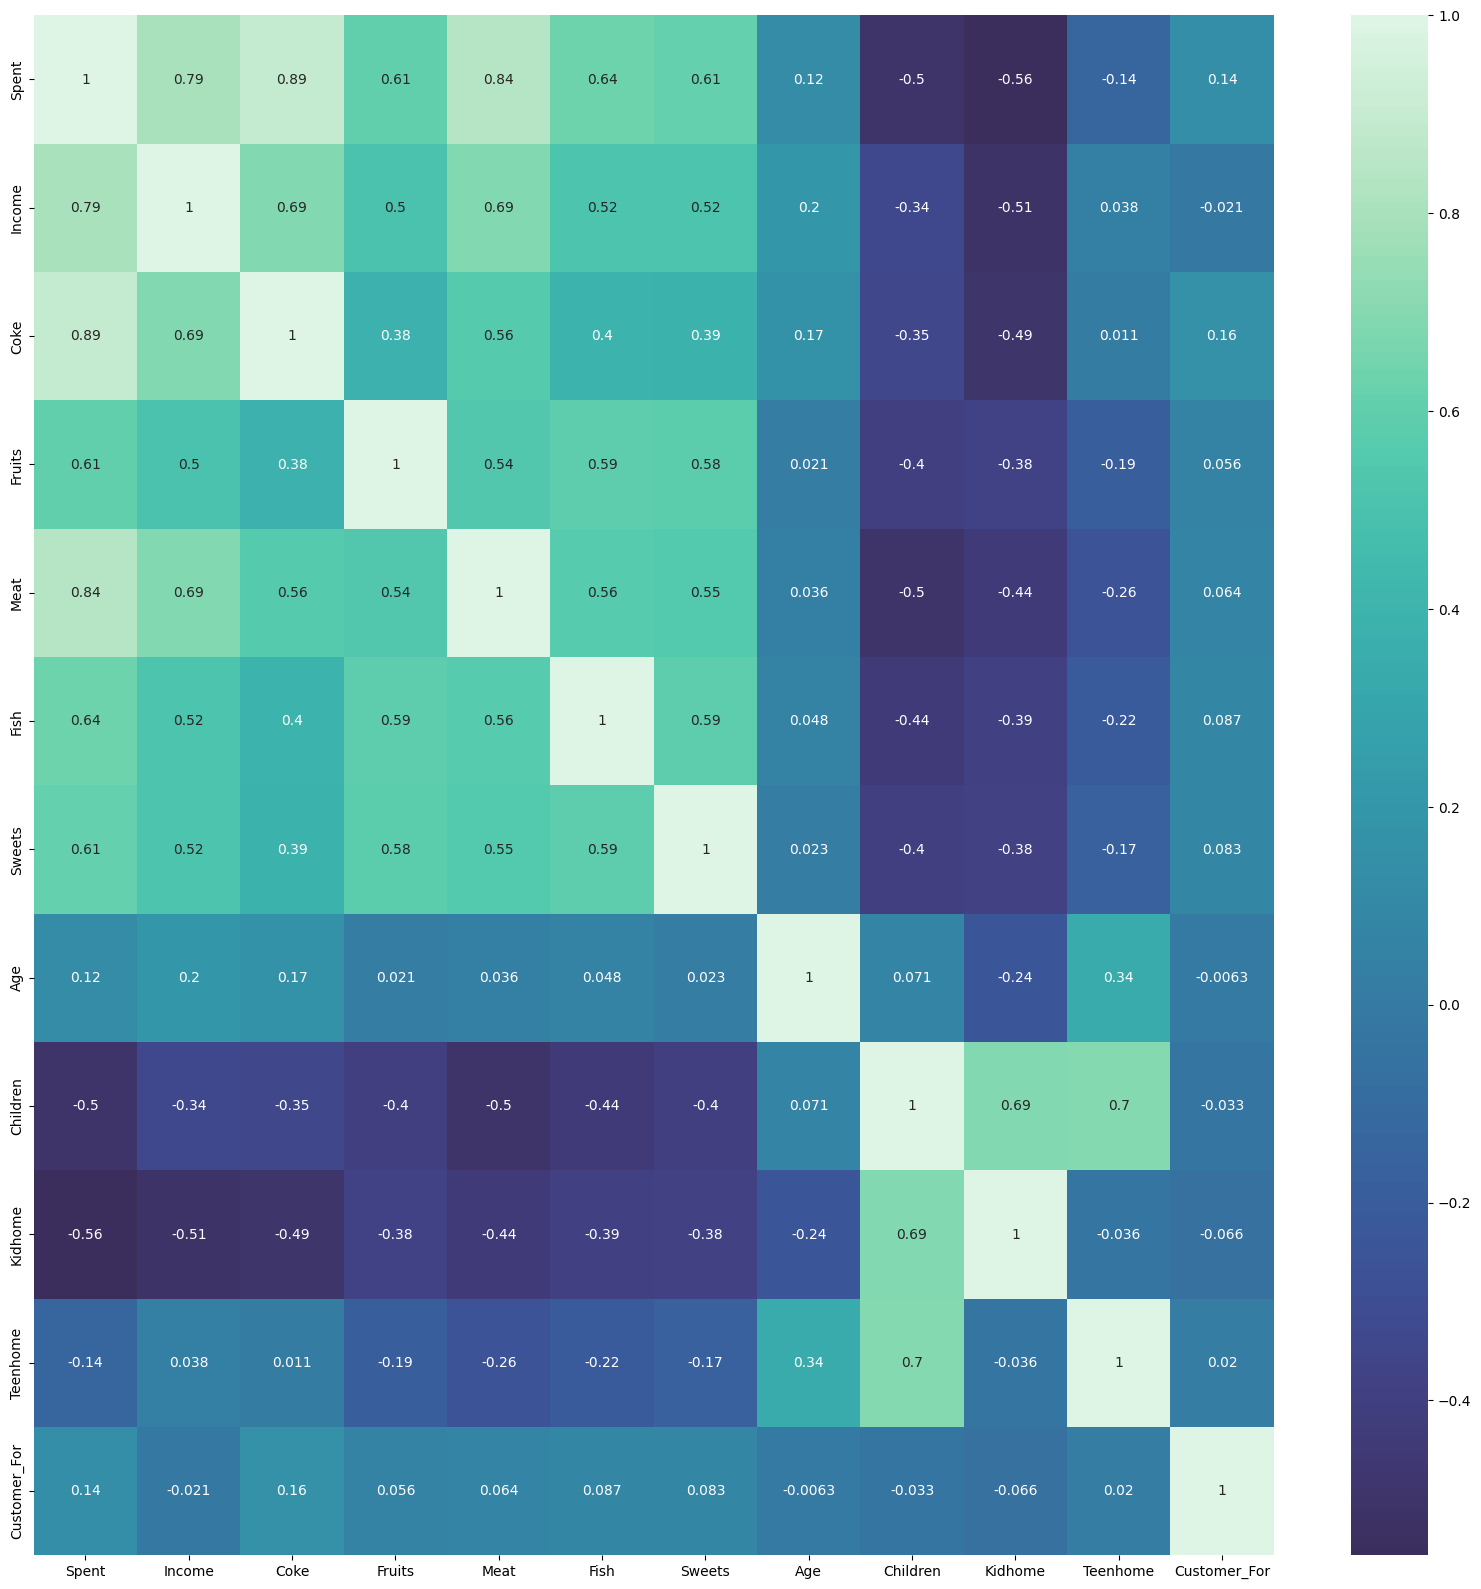

In [40]:
corr_matrix=data[['Spent','Income','Coke','Fruits', 'Meat', 'Fish', 'Sweets','Age','Children','Kidhome','Teenhome','Customer_For']].corr() 

plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix, annot = True, cmap = 'mako', center = 0)

**DATA PREPROCESSING**

In [24]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [25]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [41]:

#Scaling
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


In [42]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent,Family_Size
0,-0.833869,0.285139,-0.824613,-0.908634,0.309238,0.969963,1.567623,1.688165,2.482674,1.478884,0.877769,0.338224,1.514416,2.456014,-0.554217,0.680756,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,2.423201,1.984752,0.984657,1.678070,-1.248393,-1.565314,-0.064358
1,-0.833869,-0.264031,1.011172,0.911918,-0.382672,-0.869986,-0.631338,-0.713680,-0.646207,-0.629637,-0.733585,-0.173109,-1.161558,-0.564708,-1.170714,-0.135464,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-1.669895,1.233956,-0.960772,1.384552,0.638850,1.411887
2,-0.833869,0.912583,-0.824613,-0.908634,-0.797819,0.353698,0.581882,-0.175489,1.359958,-0.144920,-0.026161,-0.684442,1.514416,-0.229072,1.295274,-0.543574,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-0.170885,0.319857,0.282305,-1.248393,-1.565314,-0.802481
3,-0.833869,-1.181241,1.011172,-0.908634,-0.797819,-0.869986,-0.555512,-0.651410,-0.498965,-0.581165,-0.753236,-0.173109,-0.779276,-0.900343,-0.554217,0.272646,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-1.929089,-1.259041,-0.917621,0.068080,0.638850,-0.064358
4,0.070123,0.292357,1.011172,-0.908634,1.554676,-0.392307,0.430229,-0.215519,0.163621,0.000496,-0.556729,1.360890,0.367570,0.106564,0.062280,-0.135464,-0.278874,-0.282613,-0.273832,-0.256955,-0.110331,-0.101627,-0.412677,-0.823192,-1.009742,-0.305211,0.068080,0.638850,-0.802481


###  Applying Classification algorithms 

In [43]:
x=data.drop(['Response'],axis=1) 
y=data[['Response']]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
X_train

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_For,Age,Spent,Children,Is_Parent,Family_Size
580,1,45207000.0,1,1,64,203000,0,10000,0,0,2000,5,3,1,6,6,0,1,0,0,0,0,67824000000000000,47,215000,2,1,2
277,2,77882000.0,0,0,29,68000,129000,396000,188000,22000,15000,1,3,3,5,1,0,0,0,0,0,0,18921600000000000,40,818000,0,0,1
159,0,80317000.0,0,0,64,536000,11000,387000,149000,91000,57000,1,3,4,10,1,0,0,0,0,0,0,40780800000000000,66,1231000,0,0,2
494,1,55614000.0,0,0,85,504000,13000,131000,8000,0,26000,1,9,4,6,7,0,1,0,0,0,0,32227200000000000,77,682000,0,0,3
805,2,49681000.0,0,2,66,411000,0,26000,0,0,21000,6,7,1,7,7,0,0,0,0,0,0,52099200000000000,45,458000,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1,33419000.0,0,1,76,56000,0,12000,0,0,18000,2,2,0,4,7,0,0,0,0,0,0,41040000000000000,59,86000,1,1,3
1307,1,81051000.0,0,0,43,1142000,29000,249000,38000,29000,14000,1,5,5,12,2,0,1,1,0,0,0,16934400000000000,56,1501000,0,0,0
873,3,42395000.0,1,1,35,48000,13000,57000,24000,15000,25000,4,3,1,4,7,0,0,0,0,0,0,21168000000000000,40,182000,2,1,4
1476,2,64857000.0,0,0,78,556000,14000,717000,210000,0,43000,1,7,5,10,4,0,0,0,0,0,0,64108800000000000,65,1540000,0,0,2


In [45]:
X_test

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_For,Age,Spent,Children,Is_Parent,Family_Size
1465,2,49476000.0,0,1,29,386000,23000,95000,54000,41000,196000,4,2,11,5,2,0,0,0,0,0,0,46051200000000000,58,795000,1,1,4
179,3,78497000.0,0,0,44,207000,26000,447000,75000,0,223000,1,5,7,12,2,0,0,0,1,0,0,59788800000000000,70,978000,0,0,0
231,3,81975000.0,0,1,2,983000,76000,184000,180000,138000,27000,1,6,3,4,7,0,0,1,0,0,0,50371200000000000,59,1588000,1,1,4
1660,1,50729000.0,1,1,62,239000,13000,143000,45000,4000,52000,9,6,2,7,6,0,0,0,0,0,0,57715200000000000,63,496000,2,1,4
357,1,68462000.0,0,0,6,561000,64000,785000,84000,128000,48000,1,3,3,8,1,0,0,0,0,0,0,62467200000000000,52,1670000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,2,46098000.0,1,1,86,57000,0,27000,0,0,36000,4,3,2,2,8,0,0,0,0,0,0,72489600000000000,46,120000,2,1,4
1434,0,70844000.0,1,1,16,129000,26000,67000,3000,67000,2000,5,6,1,5,7,0,0,0,0,0,0,34646400000000000,54,294000,2,1,5
551,0,21474000.0,1,0,0,6000,16000,24000,11000,0,34000,2,3,1,2,7,1,0,0,0,0,0,10627200000000000,32,91000,1,1,3
174,0,52074000.0,0,1,77,59000,0,12000,0,0,48000,1,2,2,2,4,1,0,0,0,0,0,21168000000000000,54,119000,1,1,3


In [46]:
y_train

,Response
580,0
277,0
159,0
494,0
805,0
...,...
1143,0
1307,0
873,0
1476,0


In [47]:
y_test

,Response
1465,0
179,0
231,0
1660,0
357,0
...,...
1533,1
1434,0
551,1
174,0


### LOGISTIC REGRESSION: 

In [48]:
model.fit(X_train,y_train)

LogisticRegression()

In [49]:
model.score(X_test,y_test)

0.8528528528528528

### DECISIONTREE : 

In [50]:
# Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8468468468468469

### RANDOM FOREST: 

In [51]:
rclf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8468468468468469

In [52]:
# Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8798798798798799

In [53]:
#  Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

### CLASSIFICATION REPORT 

A classification report is a metric that shows the performance of a classification model on a per-class basis.
**Precision**:	Precision is defined as the ratio of true positives to the sum of true and false positives.

**Recall**:	Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score**:	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0.

**Support**:	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [54]:
from sklearn.metrics import classification_report

# Assuming 'model' is your classification model and 'X_test', 'y_test' are your test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       284
           1       0.00      0.00      0.00        49

    accuracy                           0.85       333
   macro avg       0.43      0.50      0.46       333
weighted avg       0.73      0.85      0.79       333



In [55]:
# Assuming 'model' is your classification model
y_pred_model = model.predict(X_test)

# Calculate metrics for 'model'
accuracy_model = accuracy_score(y_test, y_pred_model)
precision_model = precision_score(y_test, y_pred_model)
recall_model = recall_score(y_test, y_pred_model)
f1_model = f1_score(y_test, y_pred_model)

# Print the metrics
print(f"Metrics for Model:")
print(f"Accuracy: {accuracy_model:.4f}")
print(f"Precision: {precision_model:.4f}")
print(f"Recall: {recall_model:.4f}")
print(f"F1-score: {f1_model:.4f}")

Metrics for Model:
Accuracy: 0.8529
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


### DIMENSIONALITY REDUCTION¶ 

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA

Plotting the reduced dataframe

Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 7.

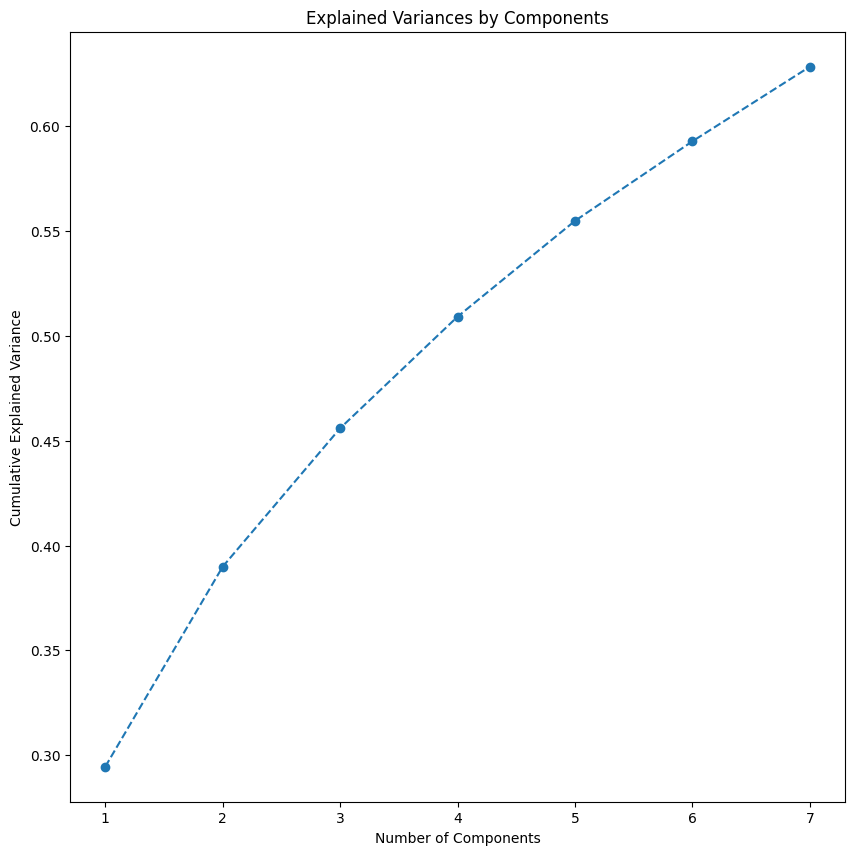

In [56]:
# Assuming data is your original dataset
pca = PCA(n_components=7)  # Specify the number of components you want
pca.fit(scaled_ds)
exp_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 8), exp_var, marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [57]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


In [58]:
pca.explained_variance_

array([8.54451683, 2.76911001, 1.91634586, 1.54466386, 1.32652519,
       1.10164672, 1.0327839 ])

In [59]:
pca.explained_variance_ratio_

array([0.29446134, 0.09542913, 0.06604116, 0.05323224, 0.04571474,
       0.03796498, 0.03559182])

In [60]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,8), columns=['Explained Variability'])

,Explained Variability
1,0.294461
2,0.095429
3,0.066041
4,0.053232
5,0.045715
6,0.037965
7,0.035592


In [61]:
pca.explained_variance_ratio_.cumsum()

array([0.29446134, 0.38989047, 0.45593163, 0.50916387, 0.55487861,
       0.59284359, 0.62843541])

In [62]:
df_PCA = pd.DataFrame(pca.transform(data))

In [63]:
df_PCA = pd.DataFrame(pca.transform(data)[:, :2], columns=['col1', 'col2'])

### ELBOW METHOD
#### FINDING 'K' VALUE:

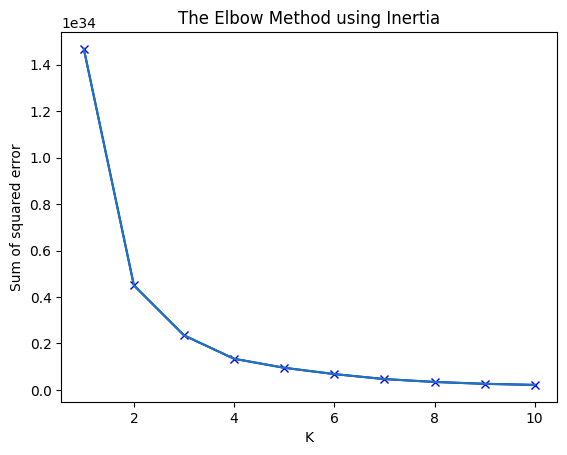

In [64]:
inertia=[]
values = range(1,11)
for i in values:
    km = KMeans(n_clusters=i)
    km.fit_predict(pd.DataFrame(df_PCA))
    inertia.append(km.inertia_)
plt.plot(values,inertia,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('The Elbow Method using Inertia')
plt.plot(values,inertia)

## K-MEANS CLUSTERING: 

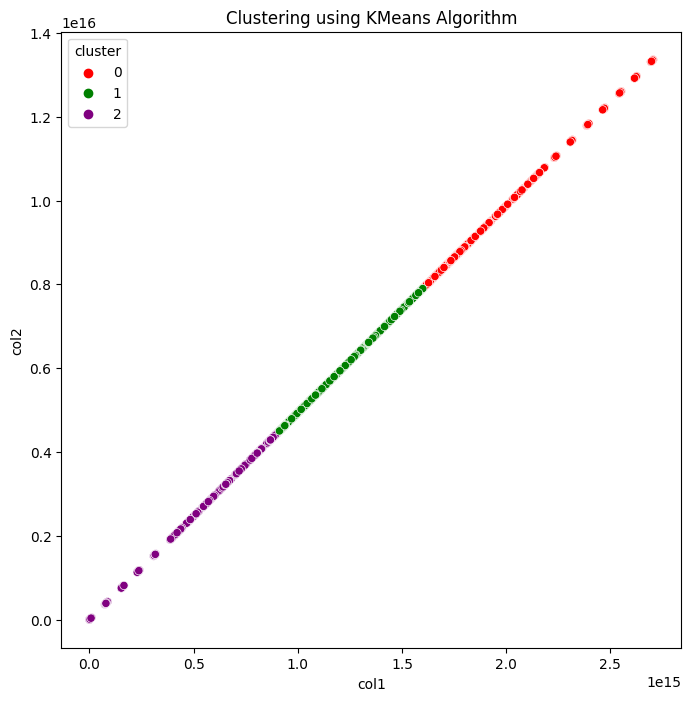

In [65]:
kmeans_model = KMeans(3) #k=3
kmeans_model.fit_predict(df_PCA)

pca_data_kmeans= pd.concat([df_PCA,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='col1', y='col2',hue='cluster',data=pca_data_kmeans,palette=['red','green','purple'])
plt.title('Clustering using KMeans Algorithm')
plt.show()


In [66]:
#find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df_PCA.columns])
#inverse transform the data
 
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df_PCA.columns])
cluster_centers

,col1,col2
0,1.963035e+15,9.694111e+15
1,1.250659e+15,6.176162e+15
2,5.656129e+14,2.793182e+15


In [67]:
#creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1) #using kmeans_model labels
cluster_df

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent,Family_Size,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.380800e+16,64.0,1617000.0,0.0,0.0,2.0,0.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.071360e+16,67.0,27000.0,2.0,1.0,4.0,2.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.069440e+16,56.0,776000.0,0.0,0.0,1.0,1.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.529600e+15,37.0,53000.0,1.0,1.0,2.0,2.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764800e+16,40.0,422000.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [68]:
cluster_df_cleaned = cluster_df.dropna()
cluster_df_cleaned 

,Education,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent,Family_Size,Cluster
0,0.0,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.380800e+16,64.0,1617000.0,0.0,0.0,2.0,0.0
1,0.0,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.071360e+16,67.0,27000.0,2.0,1.0,4.0,2.0
2,0.0,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.069440e+16,56.0,776000.0,0.0,0.0,1.0,1.0
3,0.0,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.529600e+15,37.0,53000.0,1.0,1.0,2.0,2.0
4,1.0,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.764800e+16,40.0,422000.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,3.0,50334000.0,0.0,1.0,24.0,284000.0,16000.0,160000.0,84000.0,16000.0,134000.0,6.0,7.0,4.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.311360e+16,49.0,694000.0,1.0,1.0,2.0,0.0
1659,0.0,72066000.0,0.0,0.0,55.0,1003000.0,34000.0,536000.0,134000.0,51000.0,34000.0,1.0,4.0,6.0,6.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.425600e+16,40.0,1792000.0,0.0,0.0,2.0,1.0
1660,1.0,50729000.0,1.0,1.0,62.0,239000.0,13000.0,143000.0,45000.0,4000.0,52000.0,9.0,6.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.771520e+16,63.0,496000.0,2.0,1.0,4.0,1.0
1661,0.0,34916000.0,2.0,0.0,89.0,51000.0,23000.0,82000.0,33000.0,0.0,42000.0,4.0,5.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.916160e+16,53.0,231000.0,2.0,1.0,3.0,1.0


## cluster analysis 

<Axes: xlabel='Cluster', ylabel='count'>

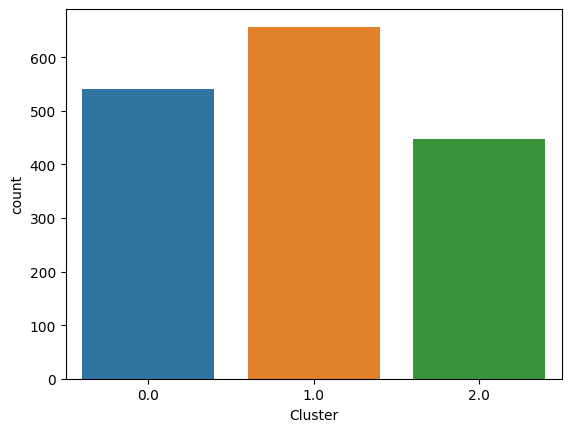

In [69]:
#vishUAlization
sns.countplot(x='Cluster', data=cluster_df_cleaned) 

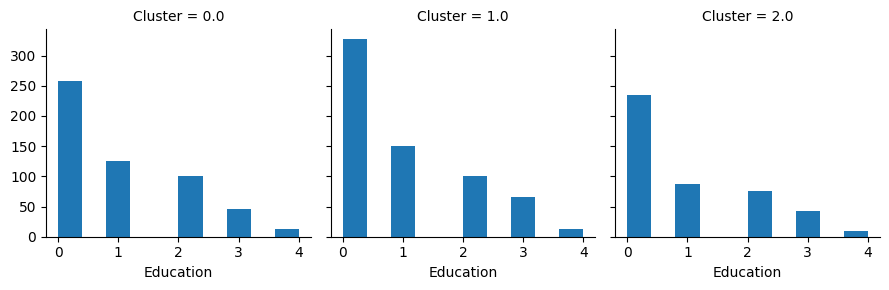

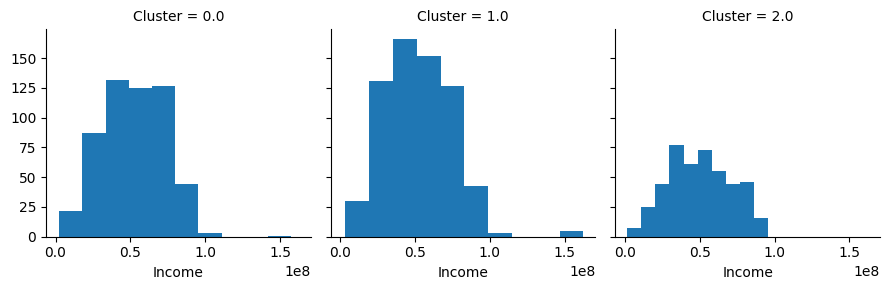

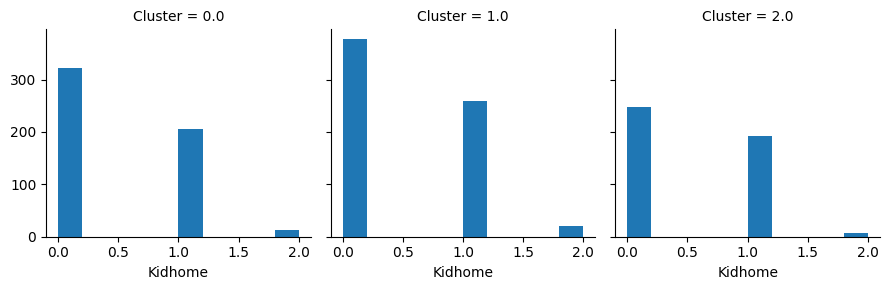

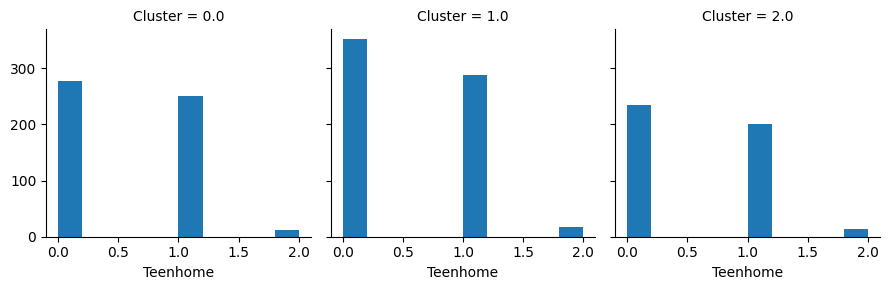

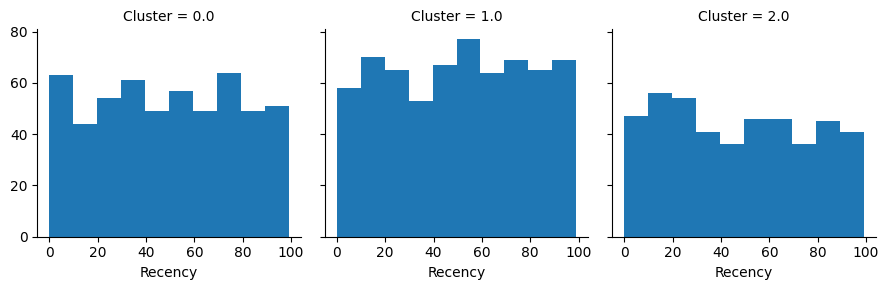

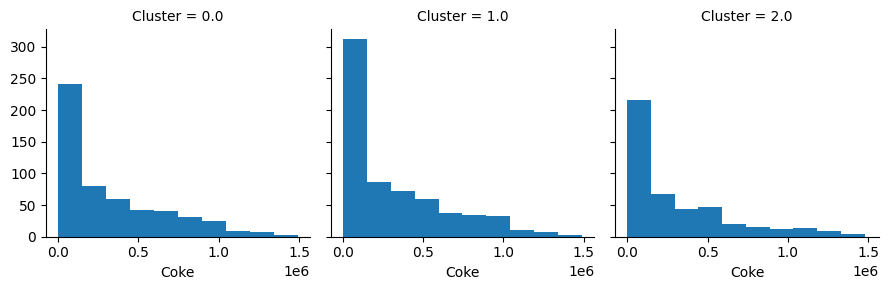

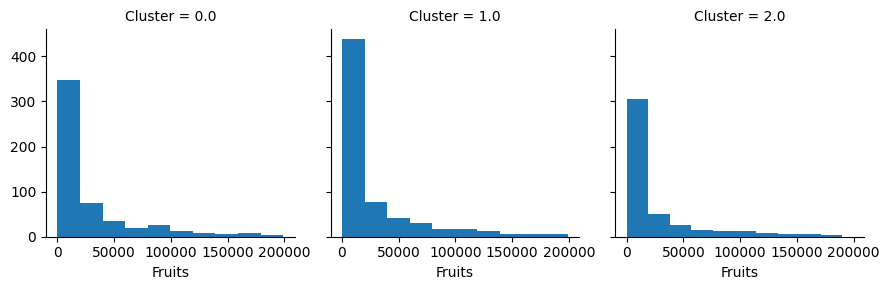

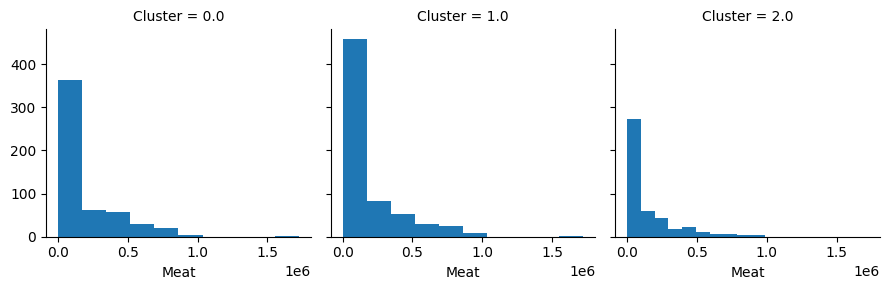

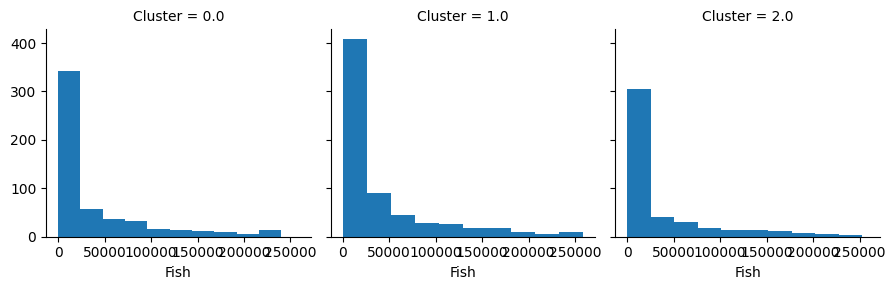

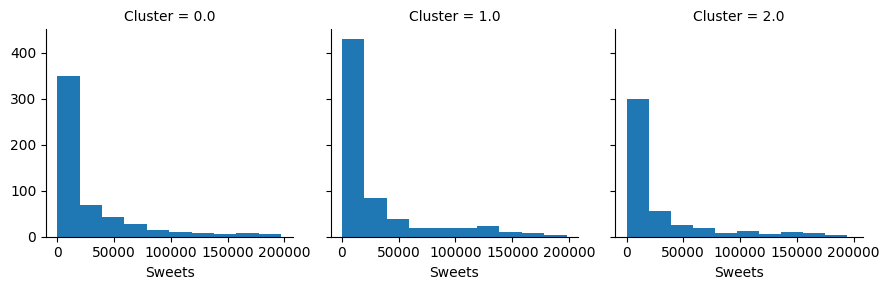

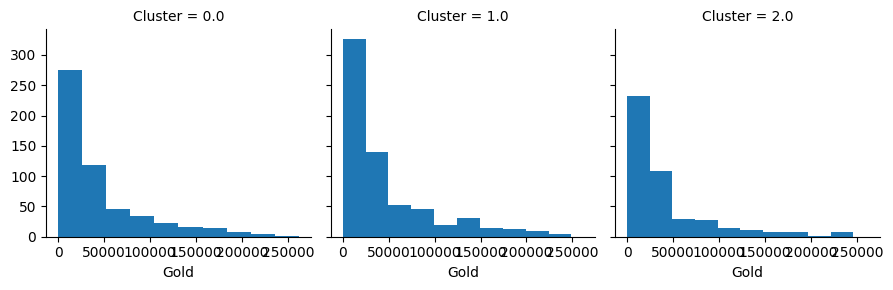

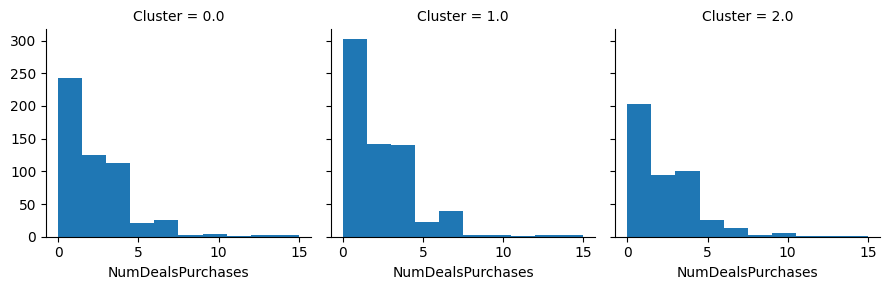

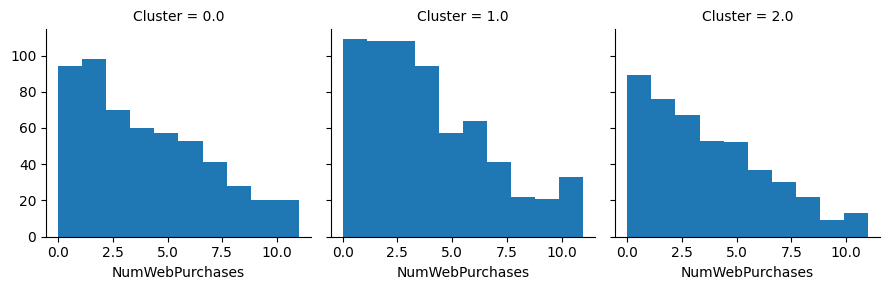

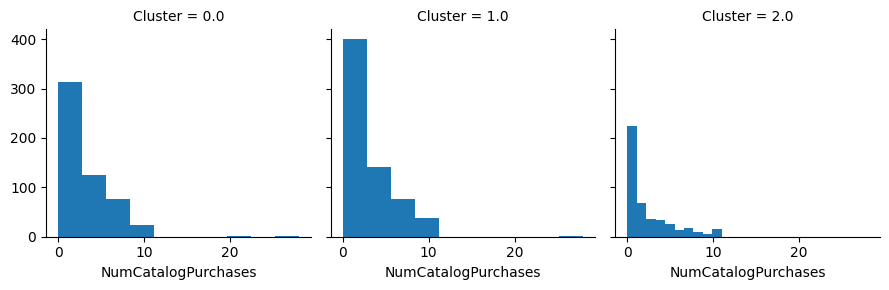

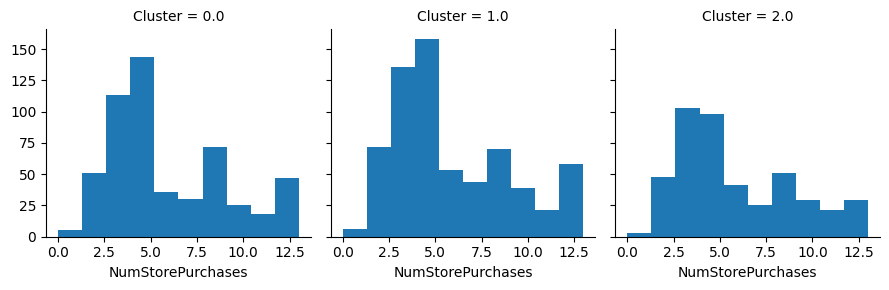

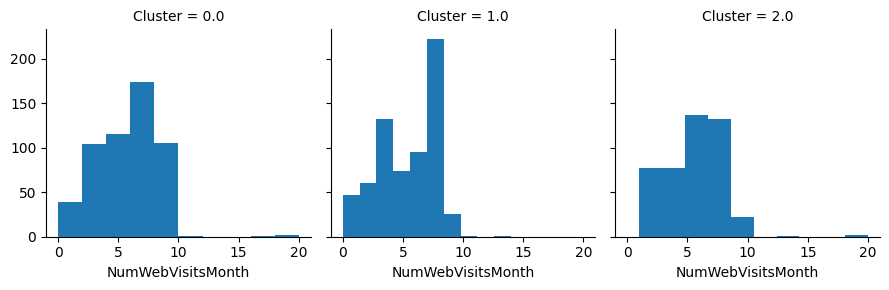

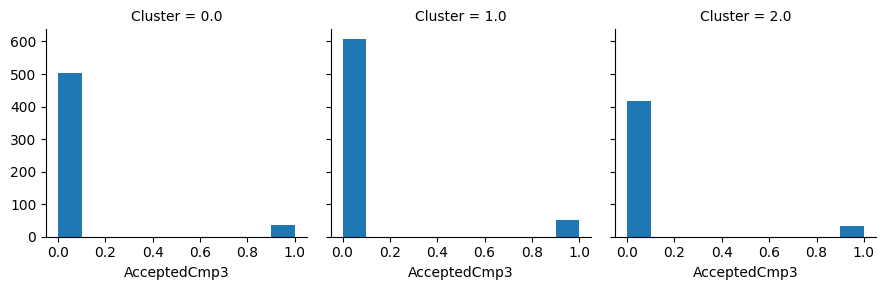

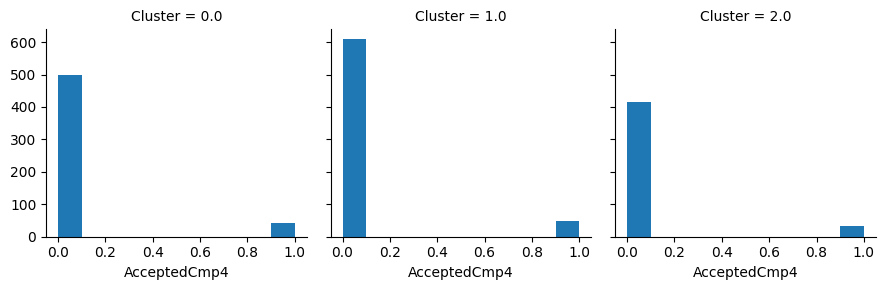

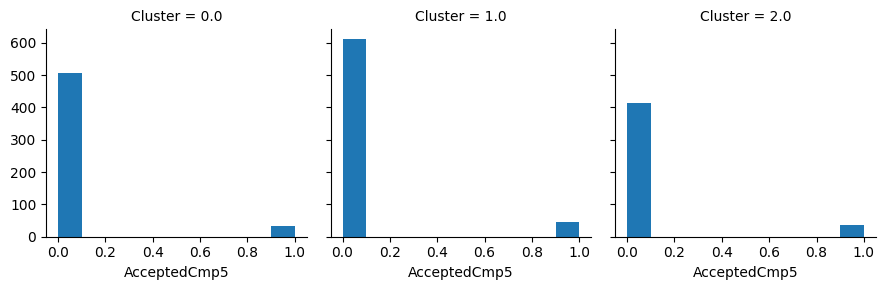

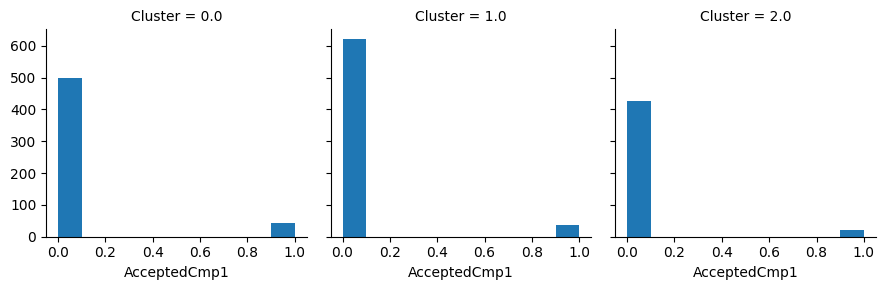

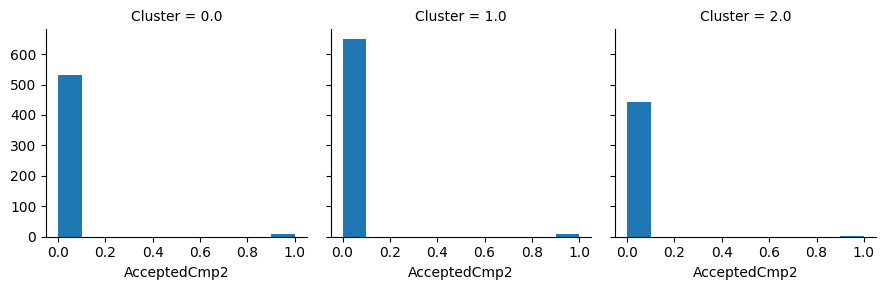

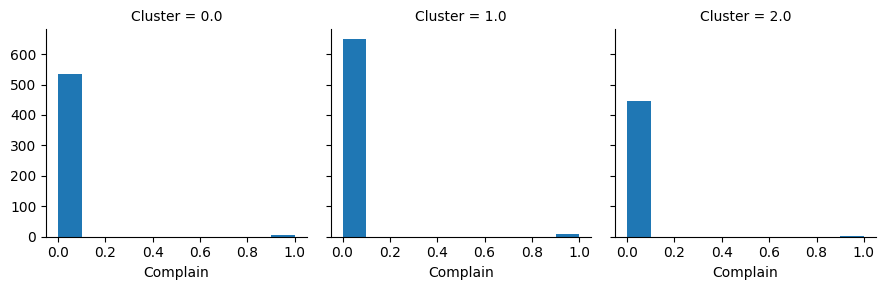

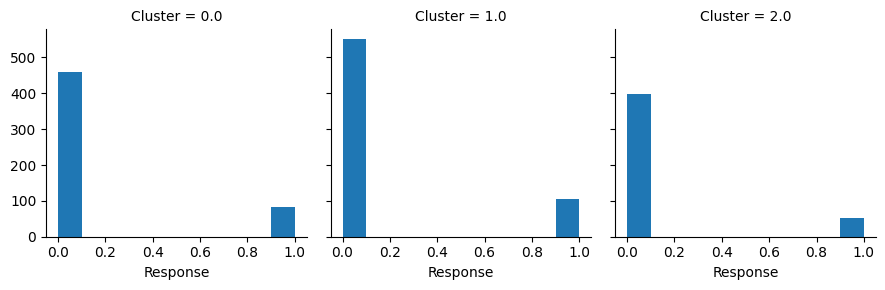

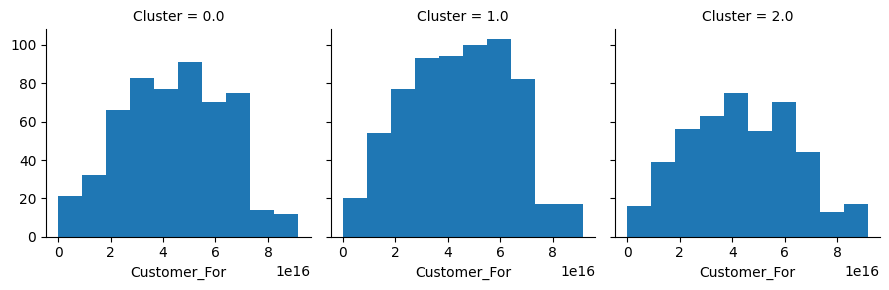

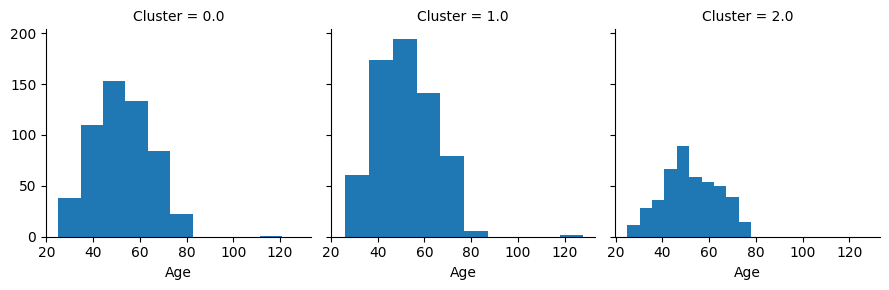

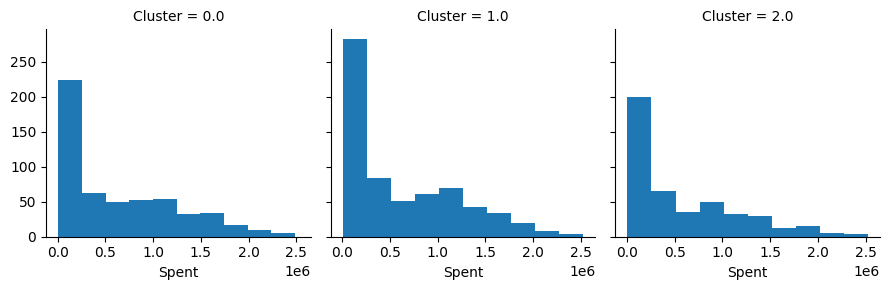

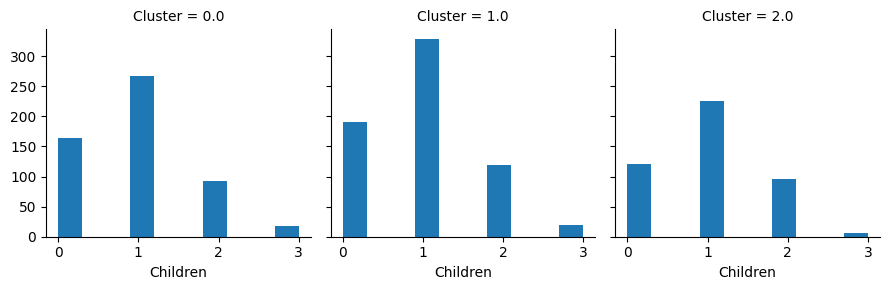

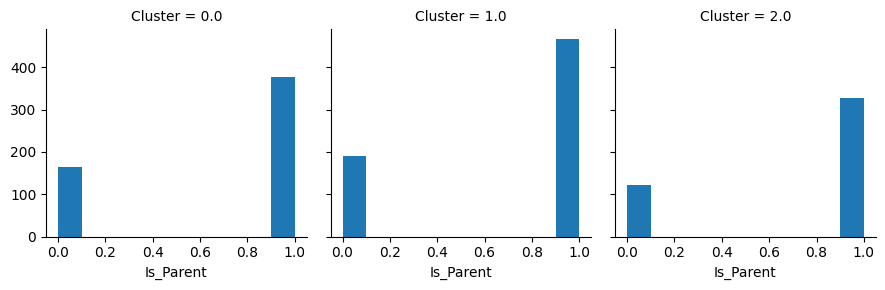

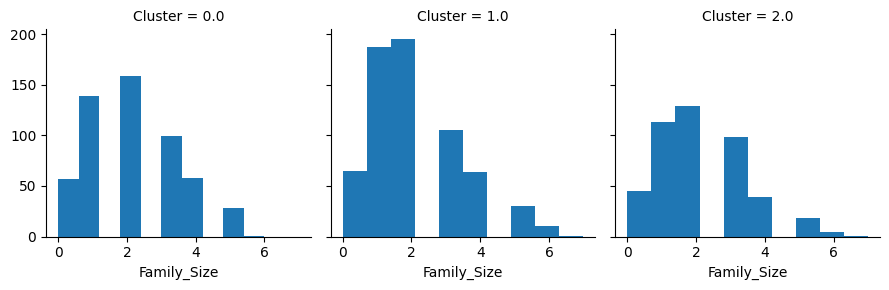

In [70]:
for c in cluster_df_cleaned.drop(['Cluster'],axis=1): 
    grid= sns.FacetGrid(cluster_df_cleaned,col='Cluster')
    grid= grid.map(plt.hist,c)
plt.show()

## SILHOUTTE_SCORE 

Silhouette Score is a metric that measures the compactness and separation of individual clusters in a dataset.

In [71]:
from sklearn.metrics import silhouette_score
labels =km.fit_predict(pd.DataFrame(df_PCA))
# Assuming 'X' is your data and 'labels' are the cluster labels assigned by your clustering algorithm
silhouette_avg = silhouette_score(df_PCA, labels)

print(f"The average silhouette_score is: {silhouette_avg}")

The average silhouette_score is: 0.5485847873881965
